Note:
* change to correct data types
* histogram of the targe variable
* remove home prices that are outliers
* min max mean of y
* Dummies

In [2]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [41]:
train = pd.read_csv('datasets/train.csv', keep_default_na=False, na_values=[''])
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000


In [73]:
train.shape

(2051, 81)

In [71]:
# Change max number of rows (to 150, for example)
pd.set_option("display.max_columns", 150)

### Pairplot

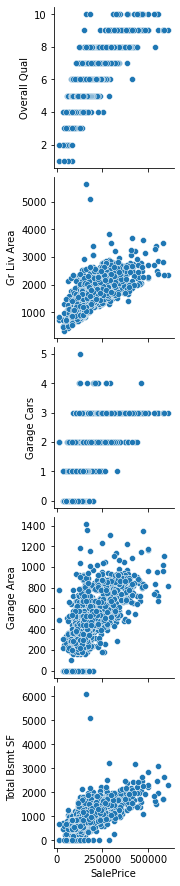

In [139]:
sns.pairplot(train, y_vars=['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF'], x_vars=['SalePrice'])

### Account for outliers in 1st Flr SF

In [5]:
train['1st Flr SF'].value_counts().sum()

2051

In [6]:
train['1st Flr SF'].value_counts().sum()

2051

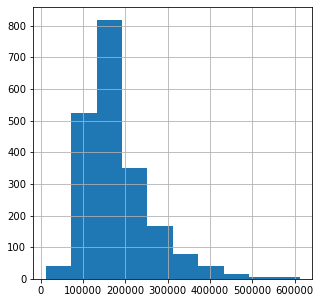

In [130]:
train['SalePrice'].hist(figsize=(5,5));

In [132]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [138]:
train['Garage Cars'].describe()

count    2050.000000
mean        1.776585
std         0.764537
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Garage Cars, dtype: float64

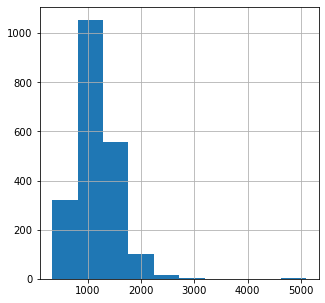

In [7]:
#distribution of 1st Flr SF
train['1st Flr SF'].hist(figsize=(5,5));

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1st Flr SF'>

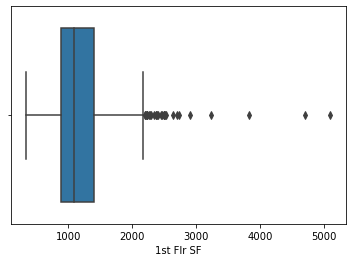

In [8]:
sns.boxplot(train['1st Flr SF'])

In [42]:
train_1stflrEDA = train[train['1st Flr SF'] < 3500]

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1st Flr SF'>

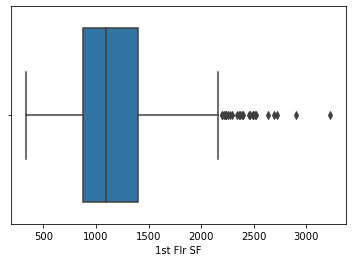

In [10]:
sns.boxplot(train_1stflrEDA['1st Flr SF'])

### Account for outliers in Gr Liv Area

In [18]:
train['Gr Liv Area'].value_counts(ascending=False)

864     25
1040    20
1092    19
1200    16
1456    15
        ..
1894     1
1898     1
2057     1
1908     1
2037     1
Name: Gr Liv Area, Length: 1053, dtype: int64

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gr Liv Area'>

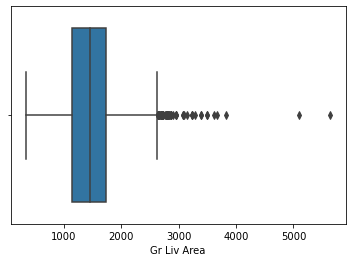

In [19]:
sns.boxplot(train['Total '])

In [134]:
train['1st Flr SF'].value_counts()

864     31
1040    22
816     13
912     13
936     12
        ..
1740     1
1738     1
1736     1
1722     1
1987     1
Name: 1st Flr SF, Length: 915, dtype: int64

In [21]:
train[train['Gr Liv Area']>4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [43]:
#New dataframe with 1st Flr and Gr Live Area EDA
train_1stflrEDA_GrlivEDA = train_1stflrEDA[train_1stflrEDA['Gr Liv Area']<4500]

### Account for outliers in Garage Cars

In [31]:
train['Garage Cars'].value_counts(ascending=False, normalize=True)

2.0    0.554146
1.0    0.255610
3.0    0.128293
0.0    0.055122
4.0    0.006341
5.0    0.000488
Name: Garage Cars, dtype: float64

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Cars'>

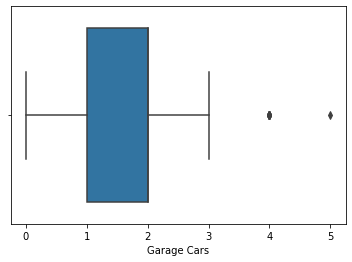

In [29]:
sns.boxplot(train['Garage Cars'])

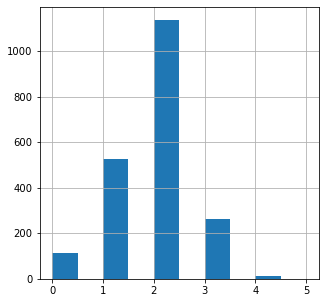

In [28]:
#plotting histogram for each variable
train['Garage Cars'].hist(figsize=(5,5));

In [44]:
#New dataframe with 1st Flr and Gr Live Area EDA and Garage Cars
train_1stflrEDA_GrlivEDA_GarageCars = train_1stflrEDA_GrlivEDA[train_1stflrEDA_GrlivEDA['Garage Cars']<4]

### Account for outliers in Overall Qual

In [33]:
train['Overall Qual'].value_counts(normalize=True)

5     0.274500
6     0.246709
7     0.210141
8     0.121892
4     0.077523
9     0.037543
3     0.014139
10    0.011214
2     0.004388
1     0.001950
Name: Overall Qual, dtype: float64

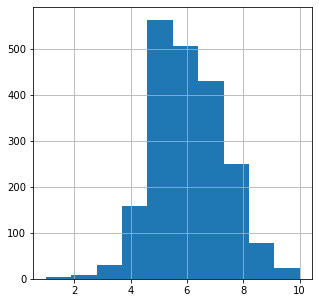

In [14]:
#plotting histogram for each variable
train['Overall Qual'].hist(figsize=(5,5));

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Qual'>

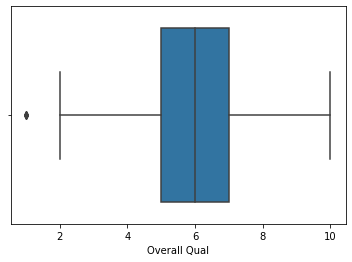

In [15]:
sns.boxplot(train['Overall Qual'])

In [45]:
#New dataframe with 1st Flr and Gr Live Area EDA and Garage Cars
train_1stflrEDA_GrlivEDA_GarageCars_OverallQual = train_1stflrEDA_GrlivEDA_GarageCars[train_1stflrEDA_GrlivEDA_GarageCars['Overall Qual']>=2]

### Account for outliers in Garage Area

In [39]:
train['Garage Area'].value_counts(ascending = False, normalize=True)

0.0       0.055122
440.0     0.034146
576.0     0.033659
484.0     0.025366
528.0     0.022439
            ...   
808.0     0.000488
752.0     0.000488
858.0     0.000488
422.0     0.000488
1174.0    0.000488
Name: Garage Area, Length: 514, dtype: float64

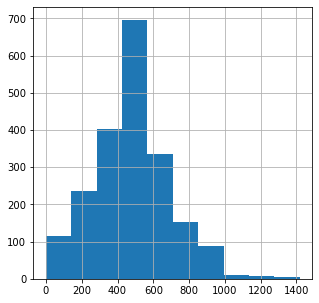

In [36]:
#plotting histogram for each variable
train['Garage Area'].hist(figsize=(5,5));

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Area'>

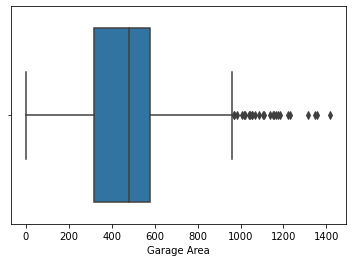

In [37]:
sns.boxplot(train['Garage Area'])

In [46]:
#New dataframe with 1st Flr and Gr Live Area EDA and Garage Cars, Overall Qual, Garage Area
train_1stflrEDA_GrlivEDA_GarageCars_OverallQual_GarageArea = train_1stflrEDA_GrlivEDA_GarageCars_OverallQual[train_1stflrEDA_GrlivEDA_GarageCars_OverallQual['Garage Area']<1100]

### Account for outliers in Sale Price

In [ ]:
#plotting histogram for each variable
train['SalePrice'].hist(figsize=(5,5));

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

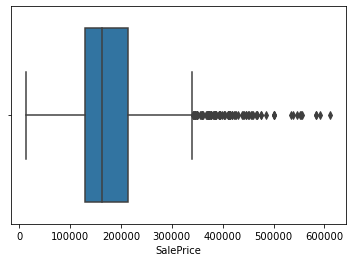

In [24]:
sns.boxplot(train['SalePrice'])

In [25]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [48]:
#New dataframe with 1st Flr (1st), Gr Live Area (GLA), Garage Cars (GC), Overall Qual (OQ), Garage Area (GA), Sale Price (SP)
train_1st_GLA_GC_OQ_GA_SP = train_1stflrEDA_GrlivEDA_GarageCars_OverallQual_GarageArea[train_1stflrEDA_GrlivEDA_GarageCars_OverallQual_GarageArea['SalePrice']<490000]

### Account for outliers in Total Bsmt SF

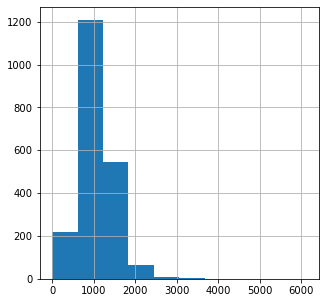

In [50]:
#plotting histogram for each variable
train['Total Bsmt SF'].hist(figsize=(5,5));

C:\Users\pharr\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Bsmt SF'>

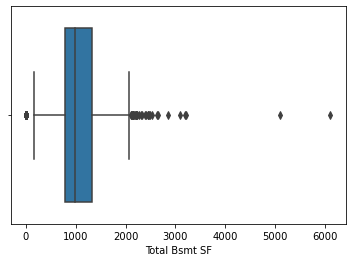

In [51]:
sns.boxplot(train['Total Bsmt SF'])

In [52]:
train['Total Bsmt SF'].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

In [56]:
train['Total Bsmt SF'].value_counts(sort = False)

0.0       54
672.0     20
1480.0     1
1405.0     6
975.0      1
          ..
1748.0     1
1361.0     1
1760.0     1
1174.0     1
1792.0     2
Name: Total Bsmt SF, Length: 892, dtype: int64

In [57]:
#New dataframe with 1st Flr (1st), Gr Live Area (GLA), Garage Cars (GC), Overall Qual (OQ), Garage Area (GA), Sale Price (SP), Total Bsmt SF (TSF)
train_1st_GLA_GC_OQ_GA_SP_TSF = train_1st_GLA_GC_OQ_GA_SP[train_1st_GLA_GC_OQ_GA_SP['Total Bsmt SF']<3000]

### Exporting general training set w/ outlier correction

In [49]:
train_1st_GLA_GC_OQ_GA_SP.to_csv('submissions/train_general.csv', index=False)

In [58]:
train_1st_GLA_GC_OQ_GA_SP_TSF.to_csv('submissions/train_general2.csv', index=False)

### Get dummies

In [128]:
# Dummy region.
data_dummies_fixable = pd.get_dummies(train, columns=['Neighborhood','Exterior 1st','Exterior 2nd','Fireplace Qu','Misc Feature','Fence','Kitchen Qual'])

In [87]:
data_dummies_highest = pd.get_dummies(train, columns=['Garage Cond','Bsmt Cond','Exter Cond'], drop_first=True)

In [89]:
data_dummies_initial = pd.get_dummies(train, columns=['Bldg Type','House Style','Condition 1','Condition 2','Lot Config'], drop_first=True)

In [72]:
data_dummies.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_NA,Fireplace Qu_Po,Fireplace Qu_TA,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [90]:
data_dummies_fixable.shape

(2051, 146)

In [ ]:
data_dummies_fixable = data_dummies['Neighborhood','Exterior 1st','Exterior 2nd','Fireplace Qu','Misc Feature','Fence','Kitchen Qual','']

### studying correlation for the categories one hot encoded

In [127]:
data_dummies_fixable_dummies = data_dummies_fixable.iloc[:,73:]
data_dummies_fixable_dummies

,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_NA,Fireplace Qu_Po,Fireplace Qu_TA,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
0,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
2,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2047,82500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2048,177000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2049,144000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [96]:
# saving correlation scores for sale price vs. all other cols
sale_price_corr = data_dummies_fixable_dummies.corr()['SalePrice']
# saving column names of >.5 correlated cols
correlated_cols = sale_price_corr[abs(sale_price_corr) > .5].index

In [125]:
pd.set_option("display.max_rows", 150)

In [126]:
sale_price_corr.sort_values(ascending=False)

SalePrice               1.000000
Neighborhood_NridgHt    0.448647
Fireplace Qu_Gd         0.384732
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Kitchen Qual_Gd         0.306246
Neighborhood_NoRidge    0.263395
Neighborhood_StoneBr    0.256977
Fence_NA                0.181758
Exterior 1st_CemntBd    0.167513
Exterior 2nd_CmentBd    0.156999
Neighborhood_Somerst    0.150078
Fireplace Qu_TA         0.147084
Neighborhood_Timber     0.116400
Neighborhood_Veenker    0.083186
Neighborhood_CollgCr    0.082309
Neighborhood_Crawfor    0.058386
Neighborhood_ClearCr    0.052503
Misc Feature_NA         0.048465
Exterior 2nd_ImStucc    0.042631
Neighborhood_GrnHill    0.038848
Neighborhood_NWAmes     0.034926
Exterior 1st_Stone      0.030371
Exterior 1st_BrkFace    0.026240
Neighborhood_Gilbert    0.023974
Exterior 1st_ImStucc    0.022446
Misc Feature_TenC       0.019101
Neighborhood_SawyerW    0.016708
Exterior 2nd_BrkFace    0.010688
Neighborhood_Greens     0.003476
Misc Featu

In [119]:
data_dummies_fixable.to_csv('datasets/data_dummies_fixable.csv', index=False)

In [98]:
data_dummies_highest.shape

(2051, 92)

In [106]:
data_dummies_highest_corr = data_dummies_highest.iloc[:,77:94]
data_dummies_highest_corr

,SalePrice,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NA,Garage Cond_Po,Garage Cond_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_NA,Bsmt Cond_Po,Bsmt Cond_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA
0,130500,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,220000,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,109000,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,174000,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,138500,0,0,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2047,82500,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2048,177000,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2049,144000,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [108]:
# saving correlation scores for sale price vs. all other cols
sale_price_corr_highest = data_dummies_highest_corr.corr()['SalePrice']
# # saving column names of >.5 correlated cols
# correlated_cols_highest = sale_price_corr_highest[abs(sale_price_corr) > .5].index

In [109]:
sale_price_corr_highest.sort_values(ascending=False)

SalePrice         1.000000
Garage Cond_TA    0.271846
Exter Cond_TA     0.122014
Bsmt Cond_Gd      0.114233
Bsmt Cond_TA      0.093635
Garage Cond_Gd    0.026683
Bsmt Cond_Po     -0.035814
Exter Cond_Po    -0.053886
Exter Cond_Gd    -0.059798
Garage Cond_Po   -0.072294
Garage Cond_Fa   -0.143176
Bsmt Cond_Fa     -0.143472
Bsmt Cond_NA     -0.154858
Exter Cond_Fa    -0.155899
Garage Cond_NA   -0.230990
Name: SalePrice, dtype: float64

In [99]:
data_dummies_initial.shape

(2051, 106)

In [113]:
data_dummies_initial_corr = data_dummies_initial.iloc[:,75:]
data_dummies_initial_corr

,SalePrice,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,130500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,220000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,109000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,174000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,138500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2047,82500,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2048,177000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2049,144000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [115]:
# saving correlation scores for sale price vs. all other cols
sale_price_corr_initial = data_dummies_initial_corr.corr()['SalePrice']
# # saving column names of >.5 correlated cols
# correlated_cols = sale_price_corr_initial[abs(sale_price_corr) > .5].index

In [116]:
sale_price_corr_initial.sort_values(ascending=False)

SalePrice             1.000000
House Style_2Story    0.201911
Lot Config_CulDSac    0.162431
Condition 1_Norm      0.111360
Condition 1_PosN      0.106877
Condition 2_PosN      0.103459
Condition 2_PosA      0.101044
Condition 1_PosA      0.070930
Bldg Type_TwnhsE      0.062037
House Style_2.5Fin    0.042516
Lot Config_FR3        0.014352
Condition 1_RRNn      0.011442
House Style_2.5Unf    0.010793
Condition 2_RRAe      0.002378
Condition 2_Norm     -0.009759
Condition 2_RRAn     -0.012421
Lot Config_FR2       -0.014823
Condition 1_RRAn     -0.014954
House Style_1Story   -0.021652
Condition 1_RRNe     -0.025045
Condition 2_RRNn     -0.033403
House Style_SLvl     -0.042098
Condition 2_Feedr    -0.048455
Condition 1_RRAe     -0.053633
House Style_SFoyer   -0.064088
House Style_1.5Unf   -0.066805
Lot Config_Inside    -0.082194
Bldg Type_Duplex     -0.103689
Bldg Type_2fmCon     -0.111423
Bldg Type_Twnhs      -0.113895
Condition 1_Feedr    -0.114350
Name: SalePrice, dtype: float64